In [1]:
import pandas as pd
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import xgboost as xgb
import utils 
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
warnings.filterwarnings(action='ignore', category=UserWarning)


c:\Users\franc.FJMOYAO\miniconda3\envs\tesis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Se leen los datos y se seleccionan las variables que presentan una diferencia
# entre los individuos que presentan estres y los que no
data_path = Path(os.getcwd()).parent / "data"
silver_path = data_path / "silver" / "dreadditCleanTrain.csv"
df = pd.read_csv(silver_path)

In [3]:
#Configuracion de visualizaciones 

# Configurar el estilo de fondo con una cuadrícula
sns.set_style("whitegrid")

# Establecer una paleta de colores profesional
sns.set_palette(['#2596be'])

# Configurar la tipografía y el tamaño de la fuente
sns.set_context("paper", font_scale=1.5, rc={"font.family": "sans-serif", "font.sans-serif": ["Helvetica", "Arial"]})

# Desactivar spines innecesarios
sns.despine(trim=True, left=True);

<Figure size 640x480 with 0 Axes>

,singular_pronouns,avg_word_len,lex_diversity
singular_pronouns,1.000000,-0.709583,-0.713724
avg_word_len,-0.709583,1.000000,0.549804
lex_diversity,-0.713724,0.549804,1.000000


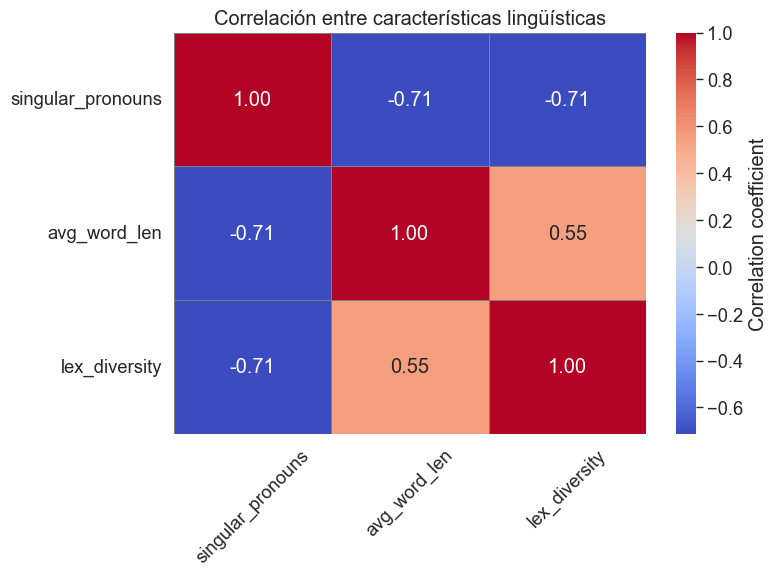

In [4]:
features =['singular_pronouns', 'avg_word_len', 'lex_diversity',
            ]
X = df.loc[:,features]
y = df.label
feature_corr = X.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.heatmap(feature_corr, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation coefficient'}, linewidths=.5, linecolor='gray')

plt.title('Correlación entre características lingüísticas')  # Add a title to the heatmap
plt.xticks(rotation=45)  # Rotate feature names for better visibility
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal for readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels


feature_corr[feature_corr.abs()>0.5]


,avg_word_len,lex_diversity
avg_word_len,1.000000,0.549804
lex_diversity,0.549804,1.000000


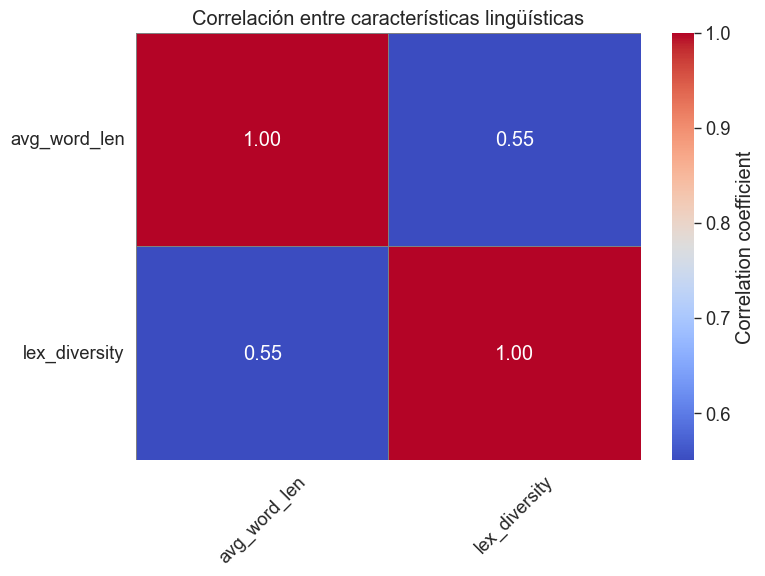

In [5]:
features =['avg_word_len', 'lex_diversity'] #Se elimina singular pronouns
X = df.loc[:,features]
y = df.label
feature_corr = X.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size for better readability
sns.heatmap(feature_corr, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={'label': 'Correlation coefficient'}, linewidths=.5, linecolor='gray')

plt.title('Correlación entre características lingüísticas')  # Add a title to the heatmap
plt.xticks(rotation=45)  # Rotate feature names for better visibility
plt.yticks(rotation=0)  # Ensure y-axis labels are horizontal for readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels


feature_corr[feature_corr.abs()>0.5]


#### **Entrenamiento y evaluacion de modelos**

In [6]:
#X.head()

In [7]:
# Get and evaluate models
#models = utils.get_models()
#results, names = [], []
#for name, model in models.items():
#    scores = utils.evaluate_model(model, X, y, name, "caracteristicas_manual")
#    results.append(scores)
#    names.append(name)
#    print(f'>{name}: Mean F1 score = {scores.mean():.2f} with Std = {scores.std():.2f}')

In [8]:
# Plotting model performance for comparison using boxplot
#plt.figure(figsize=(12, 8))
#plt.boxplot(results, labels=names, showmeans=True)
#plt.title('Model Performance Comparison')
#plt.xlabel('Model')
#plt.ylabel('F1 Score')
#plt.xticks(rotation=45)
#plt.grid(True)
#plt.tight_layout()
#plt.show()


In [9]:
# Create a DataFrame for plotting
#data = pd.DataFrame(data={name: scores for name, scores in zip(names, results)})
# Melt the DataFrame for easier plotting with seaborn
#data_melted = data.melt(var_name='Model', value_name='F1 Score')

# Create the violin plot
#plt.figure(figsize=(12, 8))  # Optional: Adjust the figure size as needed
#sns.violinplot(x='Model', y='F1 Score', data=data_melted)
#plt.title('Distribution of F1 Scores Across Models')  # Add a title to the plot
#plt.xticks(rotation=45)  # Rotate model names for better visibility
#plt.xlabel('Model')  # Label for the x-axis
#plt.ylabel('F1 Score')  # Label for the y-axis
#plt.grid(True)  # Optional: Add a grid for better readability
#plt.tight_layout()  # Adjust layout to fit everything neatly
#plt.show()

#### **Importancia de features**

In [10]:
#Se separan los datos y se entrena un modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier().fit(X_train, y_train)

In [11]:
# Crear el objeto Explainer
explainer = shap.Explainer(model, X_train)
# Calcular SHAP values
shap_values = explainer(X_test)

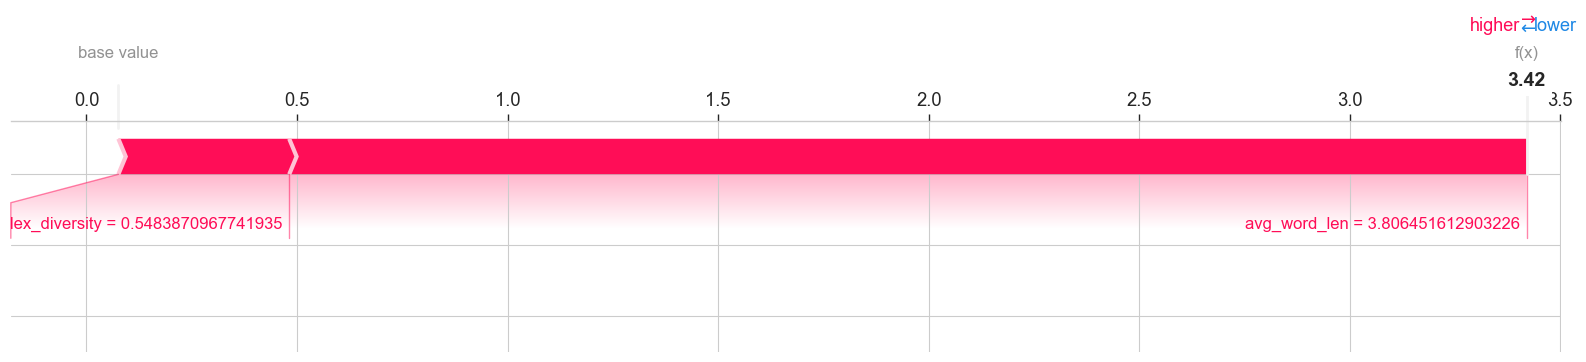

In [12]:
# Visualizar el primer prediccion
shap.plots.force(shap_values[10], matplotlib=True)

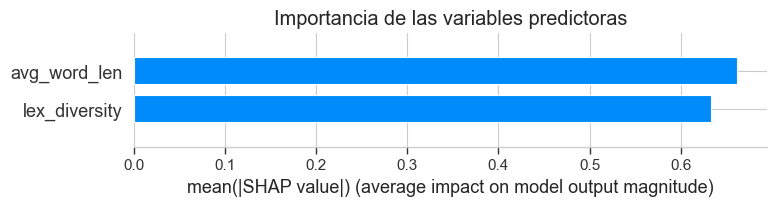

In [13]:
plt.title("Importancia de las variables predictoras")
shap.summary_plot(shap_values, X, plot_type="bar")


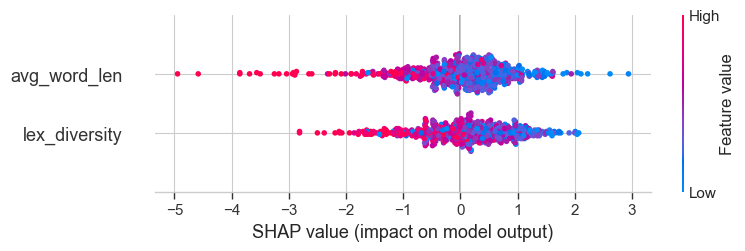

In [14]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)